# Logistic Model with Python and Mislabeled Observations

We first discuss how to fit a logistic model in python. We then discuss the problem of mislabeled observations. See logisticR.ipynb for more background on the logistic model.

In [91]:
import numpy as np
n = 100
x = np.linspace(-5,5,num=n)
beta = np.array([1.,1.])

In [92]:
## computes the p_i for any x_i and beta
def logistic(x,beta):
    return( 1 / (1+np.exp(-np.sum(x*beta))))

In [93]:
## the design matrix, we have one parameter for each column of X
X = np.column_stack((np.ones(n),x))

In [94]:
## p_i vector
p = np.apply_along_axis(lambda y: logistic(y,beta),1,X)

In [95]:
## simulate responses
y = np.random.binomial(n=1,p=p)

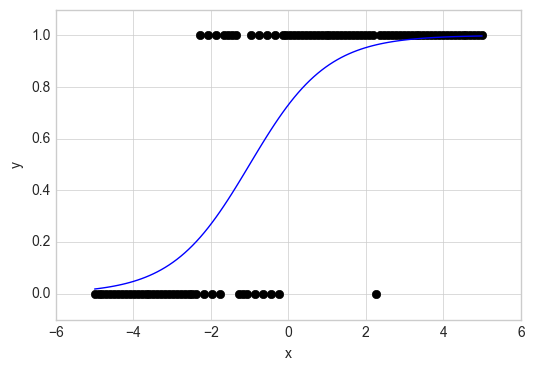

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.plot(x,y,'o',color='black')
plt.plot(x,p)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-.1,1.1);

** Exercise : ** Try altering the parameters $\beta$ and viewing how the curve and data change.

** Exercise : ** Try adding quadratic or higher order polynomial terms to the model and observing how the data and curve change.

### Python package statsmodels

[statsmodels](http://www.statsmodels.org) has many statistical functions. The function arguments and return values follow R style closely. statsmodels is developed on [github](https://github.com/statsmodels/statsmodels). statsmodels and scipy share many similarities, but statsmodels takes a statistical perspective to models, e.g. models are typically fit with no regularization and functions return parameter uncertainties. Less focus on prediction, more on parameter estimation.

In [98]:
import statsmodels.api as sm

In [99]:
results = sm.GLM(y,X,family=sm.families.Binomial()).fit()

In [100]:
results.params

array([1.52299368, 1.24997056])

## Mislabeled Case

Consider the model where a label is switched with probability $\alpha$. This would occur if your training data had observations where are mislabeled. For example in a spam classification problem the training data (consisting of email known as spam / not spam), could have some email labeled as spam which are actually not spam (and vice versa). There is a fairly large [literature](https://scholar.google.com/scholar?hl=en&as_sdt=0%2C44&q=classification+with+mislabeled+training+data&btnG=) on this subject. We study a simple model of this here.

In the standard logistic regression model we observe $(X_i,Y_i)$ pairs where $X_i \in \mathbb{R}^p$ are features and $Y_i \in \{0,1\}$ are the class labels with 
$$ p_i = \frac{1}{1 + e^{-x_i^T\beta}} $$
and $Y_i \sim Bernoulli(p_i)$.

In the mislabeled case we observe $(X_i,W_i)$ where
$$ W_i = Y_i \mathbb{1}_{Z_i=1} + R_i\mathbb{1}_{Z_i=0}$$
where $Z_i \sim Bernoulli(1-\alpha)$ and $R_i \sim Bernoulli(1/2)$ are unobserved. $Z_i$ indicates whether we observe the true label $Y_i$ or a random label $R_i$. We assume that $Z_i$ and $R_i$ are independent of each other and independent of $X_i$ and $Y_i$.

We now simulate data from this model and observe what is looks like.

** Exercise: ** Mathematically derive what happens for $\alpha$ near 1? Results simulated below.

In [161]:
import numpy as np
n = 100
x = np.linspace(-5,5,num=n)
beta = np.array([1.,1.])

In [162]:
## p_i vector
p = np.apply_along_axis(lambda y: logistic(y,beta),1,X)

In [163]:
## simulate responses
y = np.random.binomial(n=1,p=p)

In [173]:
## contamination level alpha
alpha = 0.2
z = np.random.binomial(n=1,p=1-alpha,size=n)
r = np.random.binomial(n=1,p=0.5,size=n)

In [174]:
## we observe data w
w = y*z + r*(1-z)

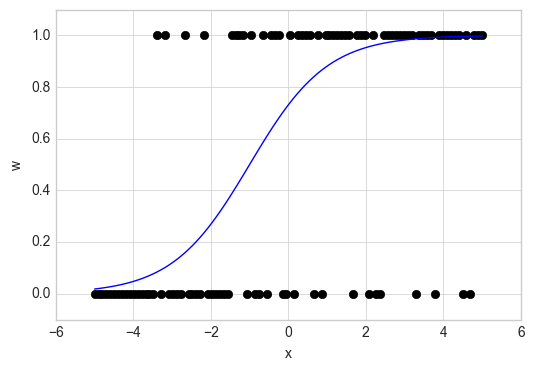

In [175]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.plot(x,w,'o',color='black')
plt.plot(x,p)
plt.xlabel("x")
plt.ylabel("w")
plt.ylim(-.1,1.1);

We observe $w=0$ at some $x$ values there $p\approx 1$. In particular for $x > 2$. These observations are highly likely to have simply been mislabeled.

In [176]:
## run model pretending no error
results = sm.GLM(w,X,family=sm.families.Binomial()).fit()
results.params

array([0.11590456, 0.48041773])

The parameter estimates are far from the true value. In fact they are bias. The slope term $\widehat{\beta}_2$ is biased toward $0$. We show this bias now by plotting the estimated logistic curve. The resulting bias should make sense, given the data.

In [177]:
pw = np.apply_along_axis(lambda y: logistic(y,results.params),1,X)

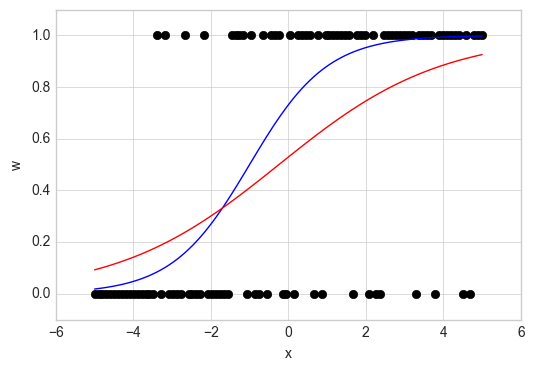

In [178]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.plot(x,w,'o',color='black')
plt.plot(x,p)
plt.plot(x,pw,color='red')
plt.xlabel("x")
plt.ylabel("w")
plt.ylim(-.1,1.1);

** Exercise: ** Empirically verify that this bias is real and not variability due to the sample size being small. Increase the sample size dramatically and observe that the parameter estimates are still far off.

In this model there are now three parameters, the $\beta$ vector and the $\alpha$ parameter. Out of the box optimizers will not work for this problem. A potential class project would be to implement this model in python or R and test it on some real and simulated data sets. 